Import libraries

In [3]:
!pip install kneed

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from kneed import KneeLocator

Load the dataset

In [5]:
data_path = '/content/clusteringweek06.csv'
data = pd.read_csv(data_path)

In [6]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


Standardize the data

In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

Define Clustering Models

In [8]:
kmeans = KMeans(random_state=0)
agglo = AgglomerativeClustering()
dbscan = DBSCAN()

Knee and Silhouette Evaluation for KMeans and Agglomerative Clustering

In [9]:
# Define cluster range
cluster_range = range(2, 11)

def evaluate_clustering(model, data, cluster_range):
    inertia = []
    silhouette_scores = []

    for k in cluster_range:
        if isinstance(model, KMeans):
            model.n_clusters = k
            model.fit(data)
            inertia.append(model.inertia_)
        elif isinstance(model, AgglomerativeClustering):
            model.n_clusters = k
            model.fit(data)
            inertia.append(None)  # No inertia for Agglomerative Clustering

        # Calculate silhouette score for each model
        labels = model.labels_
        silhouette_scores.append(silhouette_score(data, labels))

    return inertia, silhouette_scores

Evaluate KMeans

In [10]:
kmeans_inertia, kmeans_silhouette = evaluate_clustering(kmeans, data_scaled, cluster_range)

Evaluate Agglomerative Clustering

In [11]:
agglo_inertia, agglo_silhouette = evaluate_clustering(agglo, data_scaled, cluster_range)

Visualization of Knee (Elbow) Method for KMeans

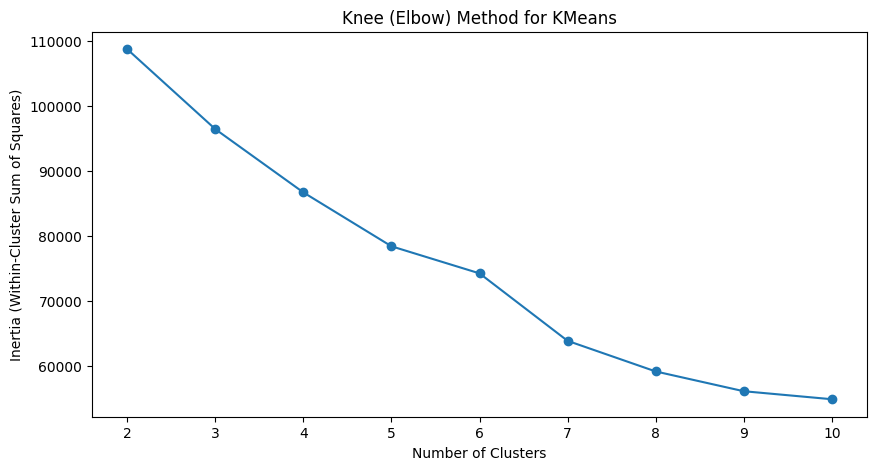

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, kmeans_inertia, marker='o')
plt.title("Knee (Elbow) Method for KMeans")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.show()

Find the knee point using the Kneed library for KMeans

In [13]:
kneedle = KneeLocator(cluster_range, kmeans_inertia, curve="convex", direction="decreasing")
optimal_k = kneedle.elbow
print(f"Optimal number of clusters for KMeans using Knee Method: {optimal_k}")

Optimal number of clusters for KMeans using Knee Method: 7


Visualization of Silhouette Score for KMeans and Agglomerative Clustering

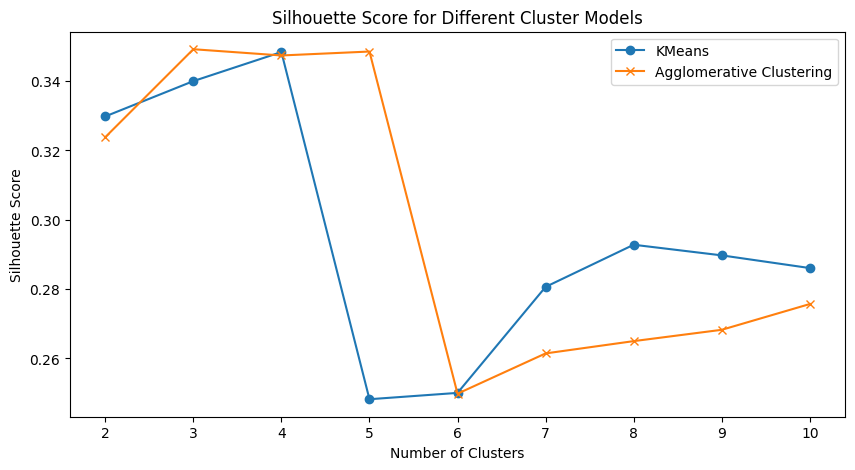

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, kmeans_silhouette, marker='o', label='KMeans')
plt.plot(cluster_range, agglo_silhouette, marker='x', label='Agglomerative Clustering')
plt.title("Silhouette Score for Different Cluster Models")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

Evaluate DBSCAN Separately (due to density-based nature)

In [15]:
dbscan.fit(data_scaled)
dbscan_labels = dbscan.labels_

Calculate silhouette and other metrics for DBSCAN

In [16]:
dbscan_silhouette = silhouette_score(data_scaled, dbscan_labels)
dbscan_davies_bouldin = davies_bouldin_score(data_scaled, dbscan_labels)
dbscan_calinski_harabasz = calinski_harabasz_score(data_scaled, dbscan_labels)

print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
print(f"DBSCAN Davies-Bouldin Index: {dbscan_davies_bouldin}")
print(f"DBSCAN Calinski-Harabasz Score: {dbscan_calinski_harabasz}")

DBSCAN Silhouette Score: -0.22711928007284996
DBSCAN Davies-Bouldin Index: 1.7753924402388312
DBSCAN Calinski-Harabasz Score: 15.308950645279376


Additional Metrics for KMeans and Agglomerative Clustering with Optimal K

In [17]:
# Fit models with optimal K from knee method
kmeans.n_clusters = optimal_k
kmeans.fit(data_scaled)
agglo.n_clusters = optimal_k
agglo.fit(data_scaled)

AgglomerativeClustering(n_clusters=7)

In [18]:
# Calculate additional metrics
kmeans_davies_bouldin = davies_bouldin_score(data_scaled, kmeans.labels_)
kmeans_calinski_harabasz = calinski_harabasz_score(data_scaled, kmeans.labels_)
agglo_davies_bouldin = davies_bouldin_score(data_scaled, agglo.labels_)
agglo_calinski_harabasz = calinski_harabasz_score(data_scaled, agglo.labels_)

print("\nKMeans Additional Metrics:")
print(f"Davies-Bouldin Index: {kmeans_davies_bouldin}")
print(f"Calinski-Harabasz Score: {kmeans_calinski_harabasz}")

print("\nAgglomerative Clustering Additional Metrics:")
print(f"Davies-Bouldin Index: {agglo_davies_bouldin}")
print(f"Calinski-Harabasz Score: {agglo_calinski_harabasz}")



KMeans Additional Metrics:
Davies-Bouldin Index: 1.3374096898415169
Calinski-Harabasz Score: 1770.3195980659737

Agglomerative Clustering Additional Metrics:
Davies-Bouldin Index: 1.34408338535116
Calinski-Harabasz Score: 1730.6620616902078


Conclusion - Determine the Best Model

In [19]:
print("\n--- Conclusion ---\n")

# Show results for KMeans
print(f"KMeans (k={optimal_k}):")
print(f"  Silhouette Score: {kmeans_silhouette[cluster_range.index(optimal_k)]}")
print(f"  Davies-Bouldin Index: {kmeans_davies_bouldin}")
print(f"  Calinski-Harabasz Score: {kmeans_calinski_harabasz}")

# Show results for Agglomerative Clustering
print(f"\nAgglomerative Clustering (k={optimal_k}):")
print(f"  Silhouette Score: {agglo_silhouette[cluster_range.index(optimal_k)]}")
print(f"  Davies-Bouldin Index: {agglo_davies_bouldin}")
print(f"  Calinski-Harabasz Score: {agglo_calinski_harabasz}")

# Show results for DBSCAN
print("\nDBSCAN:")
print(f"  Silhouette Score: {dbscan_silhouette}")
print(f"  Davies-Bouldin Index: {dbscan_davies_bouldin}")
print(f"  Calinski-Harabasz Score: {dbscan_calinski_harabasz}")


--- Conclusion ---

KMeans (k=7):
  Silhouette Score: 0.28063884572620096
  Davies-Bouldin Index: 1.3374096898415169
  Calinski-Harabasz Score: 1770.3195980659737

Agglomerative Clustering (k=7):
  Silhouette Score: 0.261455585018418
  Davies-Bouldin Index: 1.34408338535116
  Calinski-Harabasz Score: 1730.6620616902078

DBSCAN:
  Silhouette Score: -0.22711928007284996
  Davies-Bouldin Index: 1.7753924402388312
  Calinski-Harabasz Score: 15.308950645279376


Determine best model based on silhouette score, Davies-Bouldin, and Calinski-Harabasz

In [20]:
if (kmeans_silhouette[cluster_range.index(optimal_k)] > agglo_silhouette[cluster_range.index(optimal_k)] and
    kmeans_silhouette[cluster_range.index(optimal_k)] > dbscan_silhouette):
    print("\nConclusion: KMeans has the highest silhouette score, indicating better-defined clusters.")
    best_model = "KMeans"
elif (agglo_silhouette[cluster_range.index(optimal_k)] > kmeans_silhouette[cluster_range.index(optimal_k)] and
      agglo_silhouette[cluster_range.index(optimal_k)] > dbscan_silhouette):
    print("\nConclusion: Agglomerative Clustering has the highest silhouette score, indicating better-defined clusters.")
    best_model = "Agglomerative Clustering"
else:
    print("\nConclusion: DBSCAN has the highest silhouette score, indicating better-defined clusters.")
    best_model = "DBSCAN"


Conclusion: KMeans has the highest silhouette score, indicating better-defined clusters.


In [21]:
# Compare Davies-Bouldin Index
if kmeans_davies_bouldin < agglo_davies_bouldin and kmeans_davies_bouldin < dbscan_davies_bouldin:
    print("KMeans has the lowest Davies-Bouldin Index, indicating compact clusters with less overlap.")
elif agglo_davies_bouldin < kmeans_davies_bouldin and agglo_davies_bouldin < dbscan_davies_bouldin:
    print("Agglomerative Clustering has the lowest Davies-Bouldin Index, indicating compact clusters with less overlap.")
else:
    print("DBSCAN has the lowest Davies-Bouldin Index, indicating compact clusters with less overlap.")

# Compare Calinski-Harabasz Score
if kmeans_calinski_harabasz > agglo_calinski_harabasz and kmeans_calinski_harabasz > dbscan_calinski_harabasz:
    print("KMeans has the highest Calinski-Harabasz Score, indicating well-separated clusters.")
elif agglo_calinski_harabasz > kmeans_calinski_harabasz and agglo_calinski_harabasz > dbscan_calinski_harabasz:
    print("Agglomerative Clustering has the highest Calinski-Harabasz Score, indicating well-separated clusters.")
else:
    print("DBSCAN has the highest Calinski-Harabasz Score, indicating well-separated clusters.")

print(f"\nBest Model Overall Based on Evaluation Metrics: {best_model}")

KMeans has the lowest Davies-Bouldin Index, indicating compact clusters with less overlap.
KMeans has the highest Calinski-Harabasz Score, indicating well-separated clusters.

Best Model Overall Based on Evaluation Metrics: KMeans
